In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_context('notebook') # optimise figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#1F77B4','#FF7F0E','#2CA02C','#DB2728','#9467BD','#8C564B','#E377C2','#7F7F7F','#BCBD22','#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F','#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,6)

In [3]:
train = pd.read_csv("product_train.csv")

In [4]:
test = pd.read_csv("product_test.csv")

# 1. Data Processing

In [5]:
train.isna().sum()

ID                            0
Product_ID                    0
Age                           0
Review_Title               2638
Review_Text                 602
Rating                        0
Recommended                   0
Positive_Feedback_Count       0
Division                      9
Department                    9
Type                          9
dtype: int64

In [6]:
test.isna().sum()

ID                           0
Product_ID                   0
Age                          0
Review_Title               929
Review_Text                  0
Rating                       0
Positive_Feedback_Count      0
Division                     5
Department                   5
Type                         5
dtype: int64

## 1.1 Fill NA with Mode

In [7]:
train_clean = train.copy()
test_clean = test.copy()

In [8]:
category_column = ['Division', 'Department', 'Type']

for i in range(len(category_column)):
    train_clean[category_column[i]].fillna(train_clean[category_column[i]].value_counts().idxmax(), inplace = True)
    test_clean[category_column[i]].fillna(test_clean[category_column[i]].value_counts().idxmax(), inplace = True)

In [9]:
train_clean.isna().sum()

ID                            0
Product_ID                    0
Age                           0
Review_Title               2638
Review_Text                 602
Rating                        0
Recommended                   0
Positive_Feedback_Count       0
Division                      0
Department                    0
Type                          0
dtype: int64

In [10]:
test_clean.isna().sum()

ID                           0
Product_ID                   0
Age                          0
Review_Title               929
Review_Text                  0
Rating                       0
Positive_Feedback_Count      0
Division                     0
Department                   0
Type                         0
dtype: int64

## 1.2 Fill NA with '  '

In [11]:
text_column = ['Review_Text','Review_Title']

for i in range(len(text_column)):
    train_clean[text_column[i]].fillna(' ', inplace = True)
    test_clean[text_column[i]].fillna(' ', inplace = True)

In [12]:
train_clean.isna().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Recommended                0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64

In [13]:
test_clean.isna().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64

# 2. EDA

## 2.1 Descriptive Summary

In [14]:
response = 'Recommended'
predictors = ['Age', 'Rating', 'Positive_Feedback_Count']

In [31]:
descriptive = train_clean[predictors].describe()
descriptive.loc['skew', :] = train_clean.skew()
descriptive.loc['kurt', :] = train_clean.kurt()
descriptive.round(3)

,Age,Rating,Positive_Feedback_Count
count,16440.000,16440.000,16440.000
mean,43.196,4.204,2.564
std,12.273,1.106,5.911
min,18.000,1.000,0.000
25%,34.000,4.000,0.000
50%,41.000,5.000,1.000
75%,52.000,5.000,3.000
max,99.000,5.000,122.000
skew,0.532,-1.328,6.843
kurt,-0.081,0.846,77.875


In [32]:
train_clean[['Age','Recommended']].corr().round(3) # the correaltion is low

,Age,Recommended
Age,1.000,0.035
Recommended,0.035,1.000


In [33]:
train_clean[['Rating',"Recommended"]].corr().round(3) # the correaltion is high

,Rating,Recommended
Rating,1.000,0.795
Recommended,0.795,1.000


## 2.2 Countplot

## Target Variable

Text(0.5, 1.0, 'Countplot of Recommended')

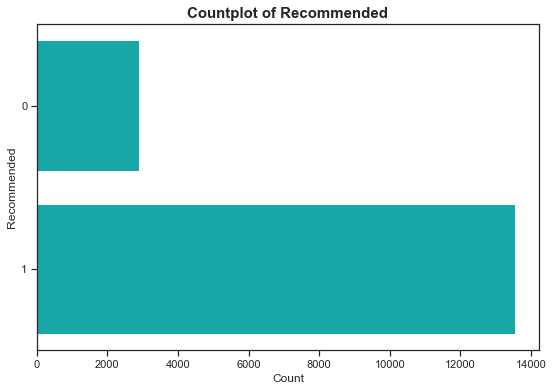

In [29]:
f, ax = plt.subplots(figsize = (9, 6))
sns.countplot(y = "Recommended", data = train_clean, color = "c")
ax.set_xlabel('Count')
ax.set_title('Countplot of Recommended', fontsize = 15, fontweight = 'bold')

In [17]:
train_clean['Recommended'].value_counts()

1    13547
0     2893
Name: Recommended, dtype: int64

## Other Variables

Text(0.5, 1.0, 'Countplot of Rating')

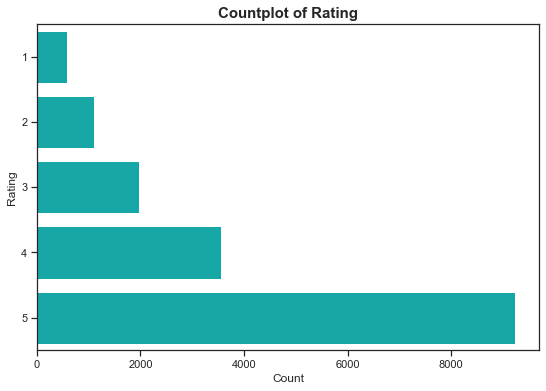

In [30]:
f, ax = plt.subplots(figsize = (9, 6))
sns.countplot(y = "Rating", data = train_clean, color = "c")
ax.set_xlabel('Count')
ax.set_title('Countplot of Rating', fontsize = 15, fontweight = 'bold')

In [19]:
train_clean['Rating'].value_counts()

5    9242
4    3557
3    1968
2    1094
1     579
Name: Rating, dtype: int64

## 2.3 Distribution Plot

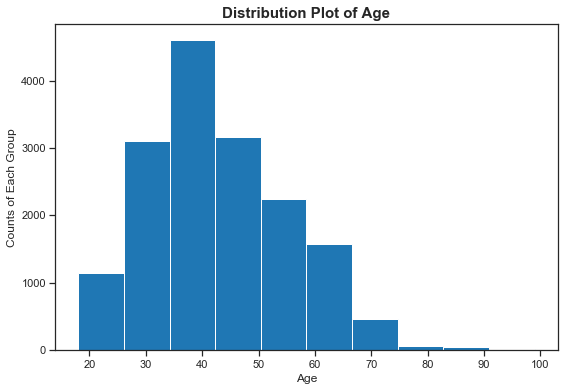

In [21]:
plt.hist(train_clean['Age'])
plt.xlabel("Age")                
plt.ylabel("Counts of Each Group")          
plt.title("Distribution Plot of Age", fontsize = 15, fontweight = 'bold')
plt.show()

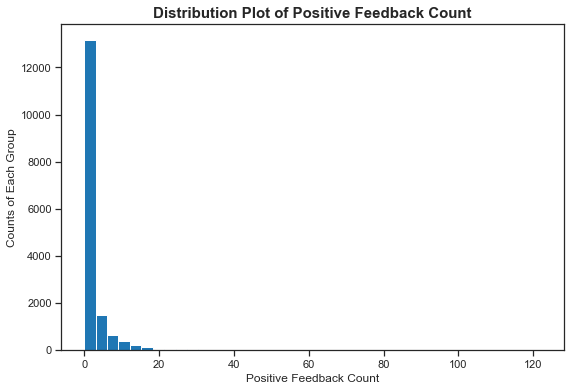

In [22]:
plt.hist(train_clean['Positive_Feedback_Count'], bins = 40)
plt.xlabel("Positive Feedback Count")                
plt.ylabel("Counts of Each Group")          
plt.title("Distribution Plot of Positive Feedback Count", fontsize = 15, fontweight = 'bold')
plt.show()

## 2.4 Logistic Regression Plot

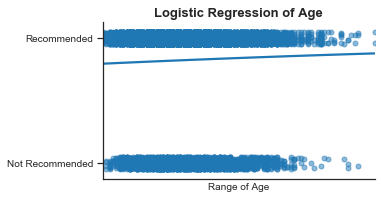

In [23]:
from statlearning import plot_logistic_regressions

predictor = ['Age']
plot_logistic_regressions(train_clean[predictor[:]], train_clean[response[:]])
plt.yticks([0, 1], ['Not Recommended', 'Recommended'], fontsize = 10)
plt.xlabel("Range of Age", fontsize = 10)                          
plt.title("Logistic Regression of Age", fontsize = 13, fontweight = 'bold')
plt.show()

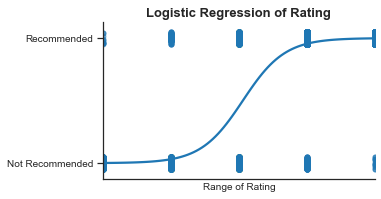

In [24]:
from statlearning import plot_logistic_regressions

predictor = ['Rating']
plot_logistic_regressions(train_clean[predictor[:]], train_clean[response[:]])
plt.yticks([0, 1], ['Not Recommended', 'Recommended'], fontsize = 10)
plt.xlabel("Range of Rating", fontsize = 10)                          
plt.title("Logistic Regression of Rating", fontsize = 13, fontweight = 'bold')
plt.show()

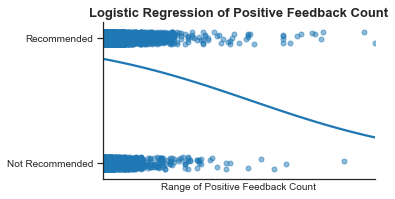

In [25]:
from statlearning import plot_logistic_regressions

predictor = ['Positive_Feedback_Count']
plot_logistic_regressions(train_clean[predictor[:]], train_clean[response[:]])
plt.yticks([0, 1], ['Not Recommended', 'Recommended'], fontsize = 10)
plt.xlabel("Range of Positive Feedback Count", fontsize = 10)                          
plt.title("Logistic Regression of Positive Feedback Count", fontsize = 13, fontweight = 'bold')
plt.show()

## 2.5 Conditional Distribution Plot

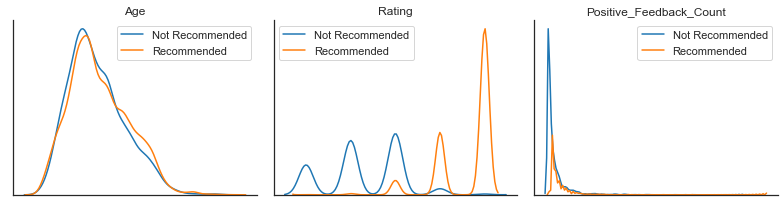

In [26]:
from statlearning import plot_conditional_distributions

plot_conditional_distributions(train_clean[predictors[:]], train_clean[response[:]], labels = ['Not Recommended', 'Recommended'])
plt.show()

## 2.6 Wordcloud

## Review Text

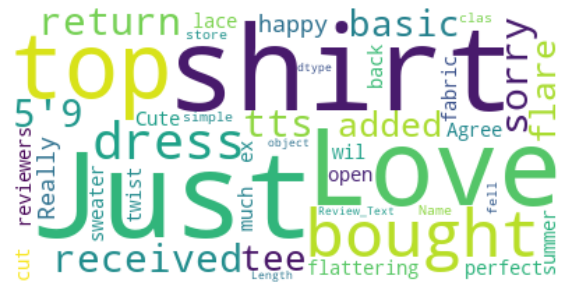

In [27]:
recommend = train_clean[train_clean['Recommended'] == 1]['Review_Text']

from wordcloud import WordCloud

fig, ax = plt.subplots(figsize = (10,8))
wordcloud = WordCloud(background_color = "white", max_words = 500).generate(str(recommend))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

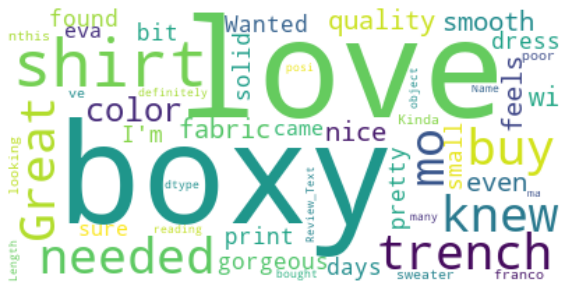

In [28]:
not_recommend = train_clean[train_clean['Recommended'] == 0]['Review_Text']

from wordcloud import WordCloud

fig, ax = plt.subplots(figsize = (10,8))
wordcloud = WordCloud(background_color = "white", max_words = 500).generate(str(not_recommend))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Review Title

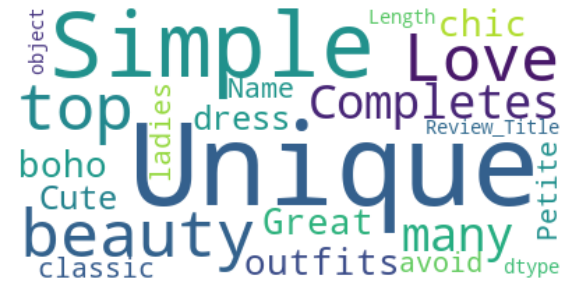

In [29]:
recommend = train_clean[train_clean['Recommended'] == 1]['Review_Title']

from wordcloud import WordCloud

fig, ax = plt.subplots(figsize = (10,8))
wordcloud = WordCloud(background_color = "white", max_words = 500).generate(str(recommend))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

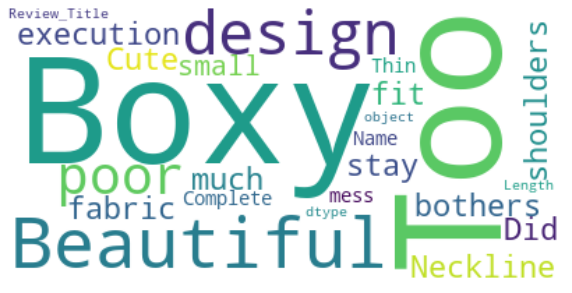

In [30]:
not_recommend = train_clean[train_clean['Recommended'] == 0]['Review_Title']

from wordcloud import WordCloud

fig, ax = plt.subplots(figsize = (10,8))
wordcloud = WordCloud(background_color = "white", max_words = 500).generate(str(not_recommend))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## 2.7 Conditional Countplot

## Division

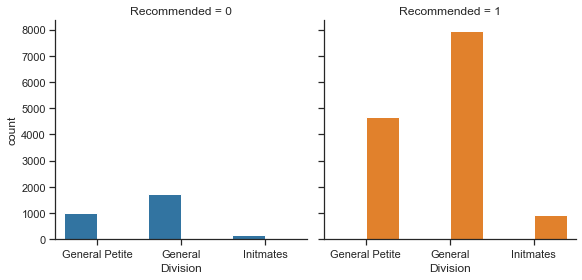

In [31]:
# Division
g = sns.catplot(x = "Division", hue = "Recommended", col = "Recommended",
                data = train_clean, kind = "count",
                height = 4, aspect = 1);

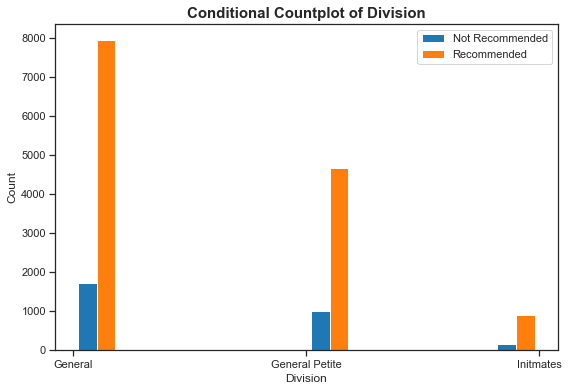

In [34]:
plt.hist([train_clean[train_clean['Recommended'] == 0]['Division'], train_clean[train_clean['Recommended'] == 1]['Division']],label = ['Not Recommended', "Recommended"])
plt.legend()
# plt.xticks(rotation = 30)
plt.title('Conditional Countplot of Division', fontsize = 15, fontweight = 'bold')
plt.xlabel('Division')
plt.ylabel('Count')
plt.show()

## Department

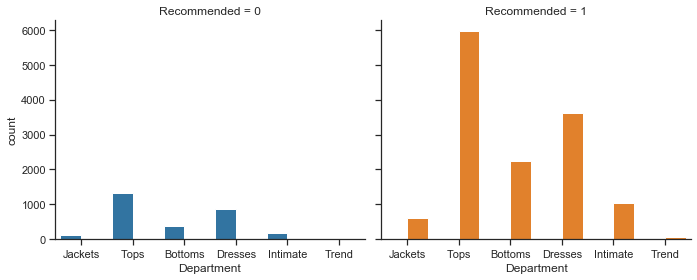

In [32]:
# Department
g = sns.catplot(x = "Department", hue = "Recommended", col = "Recommended",
                data = train_clean, kind = "count",
                height = 4, aspect = 1.2);

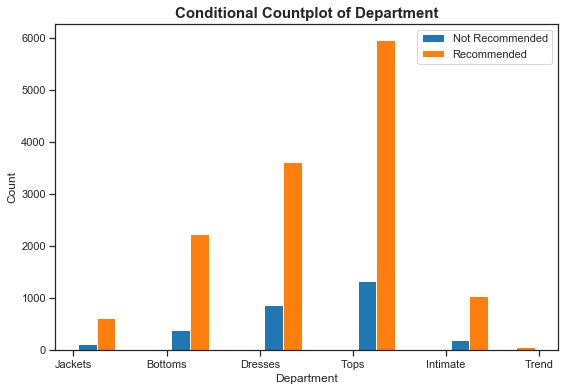

In [35]:
plt.hist([train_clean[train_clean['Recommended'] == 0]['Department'], train_clean[train_clean['Recommended'] == 1]['Department']], label = ['Not Recommended', "Recommended"])
plt.legend()
# plt.xticks(rotation = 30)
plt.title('Conditional Countplot of Department', fontsize = 15, fontweight = 'bold')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

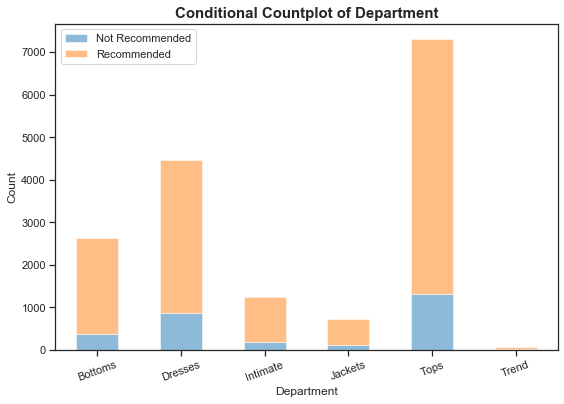

In [42]:
type_var = train_clean.groupby(['Department', 'Recommended'])['Department'].count().unstack()
pl = type_var.plot(kind = 'bar', stacked = True, alpha = .50)
pl.set_ylabel('Count')
pl.set_title('Conditional Countplot of Department', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 20)
pl.legend(['Not Recommended', 'Recommended'])
plt.show()

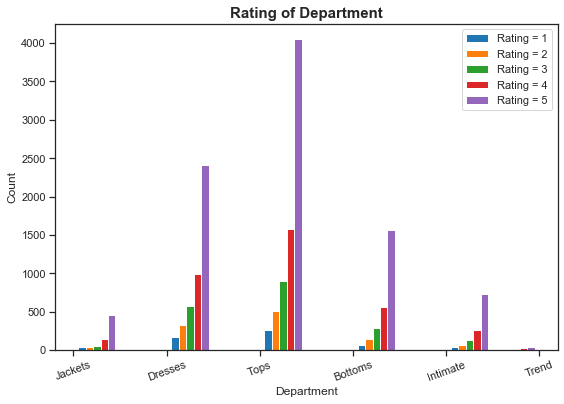

In [22]:
plt.hist([train_clean[train_clean['Rating'] == 1]['Department'], train_clean[train_clean['Rating'] == 2]['Department'], train_clean[train_clean['Rating'] == 3]['Department'], train_clean[train_clean['Rating'] == 4]['Department'], train_clean[train_clean['Rating'] == 5]['Department']], label = ['Rating = 1','Rating = 2','Rating = 3','Rating = 4','Rating = 5'])
plt.legend()
plt.xticks(rotation = 20)
plt.title('Rating of Department', fontsize = 15, fontweight = 'bold')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

## Type

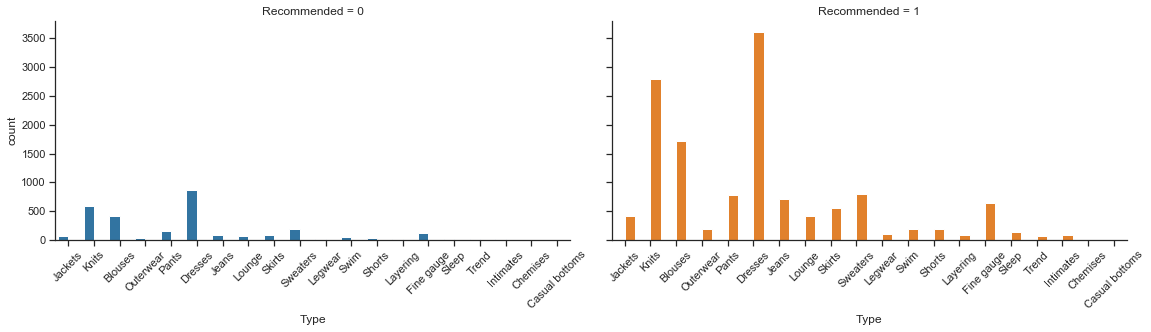

In [33]:
# Type
g = sns.catplot(x = "Type", hue = "Recommended", col = "Recommended",
                data = train_clean, kind = "count",
                height = 4, aspect = 2);

g.set_xticklabels(rotation = 45)

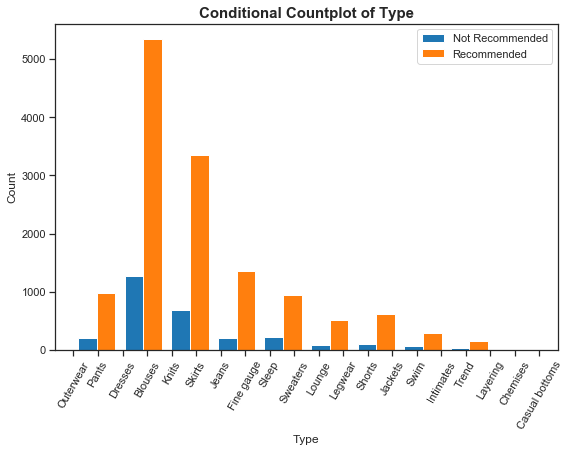

In [44]:
plt.hist([train_clean[train_clean['Recommended'] == 0]['Type'], train_clean[train_clean['Recommended'] == 1]['Type']], label = ['Not Recommended', "Recommended"])
plt.legend()
plt.xticks(rotation = 60)
plt.title('Conditional Countplot of Type', fontsize = 15, fontweight = 'bold')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

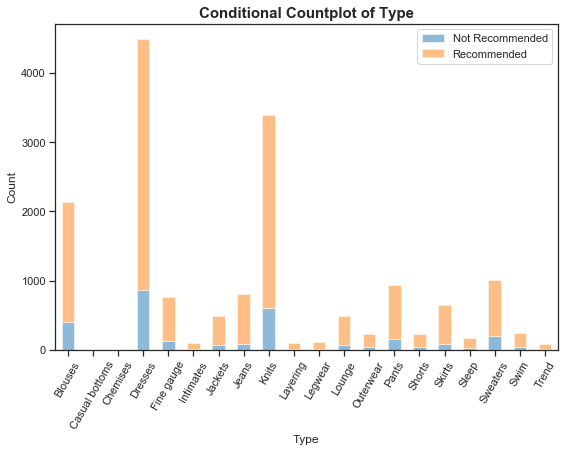

In [34]:
type_var = train_clean.groupby(['Type','Recommended'])['Type'].count().unstack()
pl = type_var.plot(kind = 'bar', stacked = True, alpha = .50)
pl.set_ylabel('Count')
pl.set_title('Conditional Countplot of Type', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 60)
pl.legend(['Not Recommended', 'Recommended'])
plt.show()

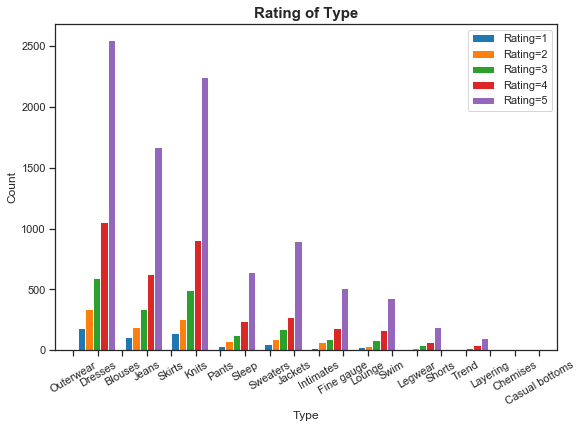

In [25]:
plt.hist([train_clean[train_clean['Rating'] == 1]['Type'], train_clean[train_clean['Rating'] == 2]['Type'], train_clean[train_clean['Rating'] == 3]['Type'], train_clean[train_clean['Rating'] == 4]['Type'], train_clean[train_clean['Rating'] == 5]['Type']], label = ['Rating=1','Rating=2','Rating=3','Rating=4','Rating=5'])
plt.legend()
plt.xticks(rotation = 30)
plt.title('Rating of Type', fontsize = 15, fontweight = 'bold')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 3. Methodology

## 3.1 Benchmark Model

## Bag of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features = 500)

train_benchmark = train_clean['Review_Text'].tolist()
# test_benchmark = test_clean['Review_Text'].tolist()

train_bow = bow.fit_transform(train_benchmark)
# test_bow = bow.fit_transform(test_benchmark)

In [46]:
train_feature_bow = pd.DataFrame(train_bow.todense(), columns = bow.get_feature_names())
# test_feature_bow = pd.DataFrame(test_bow.todense(), columns = bow.get_feature_names())

train_feature_bow.head()

,10,12,26,able,about,above,absolutely,across,actually,add,...,would,wouldn,xl,xs,xxs,year,yet,you,your,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
from sklearn.model_selection import train_test_split
y = train_clean['Recommended']
x = train_feature_bow

x_train_benchmark, x_test_benchmark, y_train_benchmark, y_test_benchmark = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [48]:
x_train_benchmark.head()

,10,12,26,able,about,above,absolutely,across,actually,add,...,would,wouldn,xl,xs,xxs,year,yet,you,your,zipper
14798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14510,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [49]:
# logistic regression
from sklearn.linear_model import LogisticRegression
benchmark_model = LogisticRegression(solver = 'liblinear')
benchmark_model.fit(x_train_benchmark, y_train_benchmark)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# predict
# model evaluation
y_pred_benchmark = benchmark_model.predict(x_test_benchmark)

from sklearn.metrics import classification_report
print(classification_report(y_test_benchmark, y_pred_benchmark, digits = 3))

              precision    recall  f1-score   support

           0      0.694     0.524     0.597       867
           1      0.903     0.951     0.927      4065

    accuracy                          0.876      4932
   macro avg      0.799     0.737     0.762      4932
weighted avg      0.867     0.876     0.869      4932



In [51]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_benchmark, y_pred_benchmark))

[[ 454  413]
 [ 200 3865]]


Normalized confusion matrix


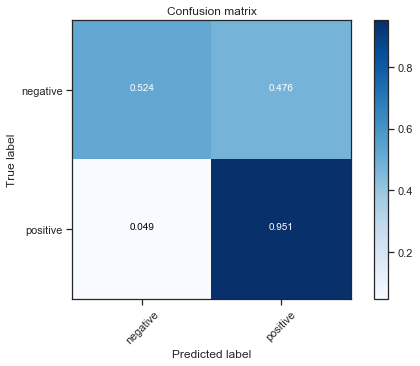

In [52]:
# draw confusion matrix
from statlearning import plot_confusion_matrix

confusion = confusion_matrix(y_test_benchmark, y_pred_benchmark)  

fig, ax = plt.subplots(figsize = (7,5))
plot_confusion_matrix(confusion, classes = ['negative', 'positive'], normalize = True)
plt.show()

## 3.2 Optimized Model

## 3.2.1 Feature Engineering

In [53]:
train_feature = train_clean.copy()
test_feature = test_clean.copy()

In [54]:
train_feature.drop(['Product_ID'], axis = 1, inplace = True)
test_feature.drop(['Product_ID'], axis = 1, inplace = True)

## 3.2.1.1 Deal with too many zeros

In [55]:
train_feature['Positive_Feedback_Count_0'] = (train_feature['Positive_Feedback_Count'] == 0).astype(int)
test_feature['Positive_Feedback_Count_0'] = (test_feature['Positive_Feedback_Count'] == 0).astype(int)

## 3.2.1.2 Get Dummies

In [56]:
counts = train_feature["Type"].value_counts()
for level in counts.index:
    if counts[level] < 20:
        train_feature.loc[train_feature['Type'] == level,'Type'] = 'Other'
        
print(train_feature['Type'].value_counts())

Dresses       4484
Knits         3393
Blouses       2129
Sweaters      1003
Pants          943
Jeans          801
Fine gauge     763
Skirts         652
Jackets        496
Lounge         493
Swim           249
Outerwear      236
Shorts         223
Sleep          166
Legwear        116
Intimates      107
Layering       103
Trend           81
Other            2
Name: Type, dtype: int64


In [57]:
counts = test_feature["Type"].value_counts()
for level in counts.index:
    if counts[level] < 20:
        test_feature.loc[test_feature['Type'] == level,'Type'] = 'Other'
        
print(test_feature['Type'].value_counts())

Dresses       1794
Knits         1383
Blouses        934
Pants          431
Sweaters       414
Jeans          333
Fine gauge     331
Skirts         283
Jackets        204
Lounge         189
Swim            94
Shorts          93
Outerwear       89
Sleep           61
Legwear         47
Intimates       45
Layering        39
Trend           38
Other            1
Name: Type, dtype: int64


In [58]:
category_column = ['Division', 'Department', 'Type']

for i in range(len(category_column)):
    train_d = pd.get_dummies(train_feature[category_column[i]], prefix = category_column[i], drop_first = True)
    train_feature = pd.concat([train_feature, train_d], axis = 1)
    train_feature = train_feature.drop(columns = category_column[i])
    
    test_d = pd.get_dummies(test_feature[category_column[i]], prefix = category_column[i], drop_first = True)
    test_feature = pd.concat([test_feature, test_d], axis = 1)
    test_feature = test_feature.drop(columns = category_column[i])

## 3.2.1.3 Text Analytics (Sentiment)

In [59]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Selina's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [61]:
train_feature = (train_feature.assign(Review_Text_Sentiment = train_feature.Review_Text.apply(lambda s: sent.polarity_scores(s)['compound'])).sort_values('Review_Text_Sentiment', ascending = False))
train_feature = (train_feature.assign(Review_Title_Sentiment = train_feature.Review_Title.apply(lambda s: sent.polarity_scores(s)['compound'])).sort_values('Review_Title_Sentiment', ascending = False))

test_feature = (test_feature.assign(Review_Text_Sentiment = test_feature.Review_Text.apply(lambda s: sent.polarity_scores(s)['compound'])).sort_values('Review_Text_Sentiment', ascending = False))
test_feature = (test_feature.assign(Review_Title_Sentiment = test_feature.Review_Title.apply(lambda s: sent.polarity_scores(s)['compound'])).sort_values('Review_Title_Sentiment', ascending = False))

train_feature.head()

,ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Positive_Feedback_Count_0,Division_General Petite,Division_Initmates,...,Type_Outerwear,Type_Pants,Type_Shorts,Type_Skirts,Type_Sleep,Type_Sweaters,Type_Swim,Type_Trend,Review_Text_Sentiment,Review_Title_Sentiment
11439,4159,32,"Love, love, love! new favorite.",What?! i can't believe this got so many mixed ...,5,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0.9448,0.9508
13981,5929,50,"Love, love, love this top!!",This top is awesome!! it is feminine and flatt...,5,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0.9236,0.9431
13485,9553,38,Love love love!!!,This dress is absolutely like a layered cloud!...,5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.4740,0.9380
9011,13945,38,Love! love! love!,A perfect summer dress! beautiful print and is...,5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.9581,0.9380
210,7251,63,Love love love!!,This is a fabulous cardigan/jacket!! i saw it ...,5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.9309,0.9347


## 3.2.1.4 TF-IDF

In [62]:
# fit TF-IDF
# Review_Text
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_text = TfidfVectorizer(stop_words = 'english', max_features = 20)

Train_Review_Text_tfidf = tfidf_vectorizer_text.fit_transform(train_feature['Review_Text'])
Test_Review_Text_tfidf = tfidf_vectorizer_text.fit_transform(test_feature['Review_Text'])

In [63]:
# Review_Title
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_title = TfidfVectorizer(stop_words = 'english', max_features = 20)

Train_Review_Title_tfidf = tfidf_vectorizer_title.fit_transform(train_feature['Review_Title'])
Test_Review_Title_tfidf = tfidf_vectorizer_title.fit_transform(test_feature['Review_Title'])

In [64]:
# create table
# Review_Text
Train_Review_Text_table = pd.DataFrame(Train_Review_Text_tfidf.todense(), columns = tfidf_vectorizer_text.get_feature_names())
Test_Review_Text_table = pd.DataFrame(Test_Review_Text_tfidf.todense(), columns = tfidf_vectorizer_text.get_feature_names())

Train_Review_Text_table.head()

,color,comfortable,cute,dress,fabric,fit,flattering,great,just,like,little,look,love,ordered,perfect,really,size,small,soft,wear
0,0.407070,0.0,0.000000,0.0,0.0,0.433917,0.370069,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.433855,0.436301,0.0,0.0,0.000000,0.361206
1,0.363557,0.0,0.000000,0.0,0.0,0.387534,0.000000,0.000000,0.000000,0.783311,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.322596
2,0.000000,0.0,0.521461,0.0,0.0,0.000000,0.000000,0.000000,0.534164,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.665393,0.000000
3,0.000000,0.0,0.809942,0.0,0.0,0.338018,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.337969,0.339875,0.0,0.0,0.000000,0.000000
4,0.606977,0.0,0.000000,0.0,0.0,0.000000,0.551805,0.571918,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [65]:
# Review_Title
Train_Review_Title_table = pd.DataFrame(Train_Review_Title_tfidf.todense(), columns = tfidf_vectorizer_title.get_feature_names())
Test_Review_Title_table = pd.DataFrame(Test_Review_Title_tfidf.todense(), columns = tfidf_vectorizer_title.get_feature_names())

Train_Review_Title_table.head()

,beautiful,comfortable,comfy,cute,dress,fit,flattering,gorgeous,great,love,lovely,nice,perfect,pretty,runs,shirt,small,soft,summer,sweater
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
top_words = ['comfortable', 'cute', 'fit', 'flattering', 'great', 'love', 'perfect', 'soft']

for i in range(len(top_words)):
    y = [Train_Review_Text_table[top_words[i]], Train_Review_Title_table[top_words[i]]]
    c = np.array(y)
    train_feature[top_words[i]] = list(np.mean(c, axis = 0))
    
    z = [Test_Review_Text_table[top_words[i]], Test_Review_Title_table[top_words[i]]]
    c = np.array(z)
    test_feature[top_words[i]] = list(np.mean(c, axis = 0))

In [67]:
train_feature.head()

,ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Positive_Feedback_Count_0,Division_General Petite,Division_Initmates,...,Review_Text_Sentiment,Review_Title_Sentiment,comfortable,cute,fit,flattering,great,love,perfect,soft
11439,4159,32,"Love, love, love! new favorite.",What?! i can't believe this got so many mixed ...,5,1,2,0,1,0,...,0.9448,0.9508,0.0,0.000000,0.216958,0.185034,0.000000,0.0,0.216927,0.000000
13981,5929,50,"Love, love, love this top!!",This top is awesome!! it is feminine and flatt...,5,1,2,0,0,0,...,0.9236,0.9431,0.0,0.000000,0.193767,0.000000,0.000000,0.0,0.000000,0.000000
13485,9553,38,Love love love!!!,This dress is absolutely like a layered cloud!...,5,1,1,0,0,0,...,0.4740,0.9380,0.0,0.260731,0.000000,0.000000,0.000000,0.0,0.000000,0.332696
9011,13945,38,Love! love! love!,A perfect summer dress! beautiful print and is...,5,1,1,0,1,0,...,0.9581,0.9380,0.0,0.404971,0.169009,0.000000,0.000000,0.0,0.168985,0.000000
210,7251,63,Love love love!!,This is a fabulous cardigan/jacket!! i saw it ...,5,1,1,0,0,0,...,0.9309,0.9347,0.0,0.000000,0.000000,0.275902,0.285959,0.0,0.000000,0.000000


In [68]:
train_feature.columns

Index(['ID', 'Age', 'Review_Title', 'Review_Text', 'Rating', 'Recommended',
       'Positive_Feedback_Count', 'Positive_Feedback_Count_0',
       'Division_General Petite', 'Division_Initmates', 'Department_Dresses',
       'Department_Intimate', 'Department_Jackets', 'Department_Tops',
       'Department_Trend', 'Type_Dresses', 'Type_Fine gauge', 'Type_Intimates',
       'Type_Jackets', 'Type_Jeans', 'Type_Knits', 'Type_Layering',
       'Type_Legwear', 'Type_Lounge', 'Type_Other', 'Type_Outerwear',
       'Type_Pants', 'Type_Shorts', 'Type_Skirts', 'Type_Sleep',
       'Type_Sweaters', 'Type_Swim', 'Type_Trend', 'Review_Text_Sentiment',
       'Review_Title_Sentiment', 'comfortable', 'cute', 'fit', 'flattering',
       'great', 'love', 'perfect', 'soft'],
      dtype='object')

In [69]:
train_feature.drop(['Review_Title', 'Review_Text'], axis = 1, inplace = True)
test_feature.drop(['Review_Title', 'Review_Text'], axis = 1, inplace = True)

train_feature.head()

,ID,Age,Rating,Recommended,Positive_Feedback_Count,Positive_Feedback_Count_0,Division_General Petite,Division_Initmates,Department_Dresses,Department_Intimate,...,Review_Text_Sentiment,Review_Title_Sentiment,comfortable,cute,fit,flattering,great,love,perfect,soft
11439,4159,32,5,1,2,0,1,0,1,0,...,0.9448,0.9508,0.0,0.000000,0.216958,0.185034,0.000000,0.0,0.216927,0.000000
13981,5929,50,5,1,2,0,0,0,0,0,...,0.9236,0.9431,0.0,0.000000,0.193767,0.000000,0.000000,0.0,0.000000,0.000000
13485,9553,38,5,1,1,0,0,0,1,0,...,0.4740,0.9380,0.0,0.260731,0.000000,0.000000,0.000000,0.0,0.000000,0.332696
9011,13945,38,5,1,1,0,1,0,1,0,...,0.9581,0.9380,0.0,0.404971,0.169009,0.000000,0.000000,0.0,0.168985,0.000000
210,7251,63,5,1,1,0,0,0,0,0,...,0.9309,0.9347,0.0,0.000000,0.000000,0.275902,0.285959,0.0,0.000000,0.000000


In [70]:
train_data = train_feature.sort_index()
test_data = test_feature.sort_index()

train_data.head()

,ID,Age,Rating,Recommended,Positive_Feedback_Count,Positive_Feedback_Count_0,Division_General Petite,Division_Initmates,Department_Dresses,Department_Intimate,...,Review_Text_Sentiment,Review_Title_Sentiment,comfortable,cute,fit,flattering,great,love,perfect,soft
0,12906,57,4,1,1,0,1,0,0,0,...,-0.0772,0.0000,0.0,0.0,0.000000,0.0,0.219203,0.0,0.000000,0.0
1,22440,60,5,1,3,0,1,0,0,0,...,0.9531,0.5859,0.0,0.0,0.000000,0.0,0.202221,0.0,0.228739,0.0
2,13965,35,5,1,0,1,0,0,0,0,...,0.9215,0.7424,0.0,0.0,0.219629,0.0,0.000000,0.0,0.000000,0.0
3,14369,45,5,1,0,1,1,0,0,0,...,0.8012,0.0000,0.0,0.0,0.288160,0.0,0.000000,0.0,0.288119,0.0
4,505,56,4,1,0,1,0,0,0,0,...,0.9022,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [71]:
train_feature_list = train_data.columns.tolist()

In [72]:
train_feature_list.remove('Recommended')
train_feature_list.remove('ID')

In [73]:
# train_test_split
y = train_data['Recommended']
x = train_data.loc[:, train_feature_list]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [74]:
x_train.head()

,Age,Rating,Positive_Feedback_Count,Positive_Feedback_Count_0,Division_General Petite,Division_Initmates,Department_Dresses,Department_Intimate,Department_Jackets,Department_Tops,...,Review_Text_Sentiment,Review_Title_Sentiment,comfortable,cute,fit,flattering,great,love,perfect,soft
14798,42,4,5,0,0,0,0,0,0,0,...,0.4548,0.6369,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
14510,36,3,0,1,1,0,0,0,0,1,...,0.9542,0.4019,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
8009,49,5,2,0,1,0,0,0,0,1,...,0.9862,0.4376,0.00000,0.000000,0.144561,0.5,0.127784,0.000000,0.0,0.000000
12666,24,5,0,1,1,0,1,0,0,0,...,0.8945,0.7964,0.20593,0.314839,0.197091,0.0,0.174217,0.000000,0.0,0.000000
12044,43,5,0,1,0,0,0,0,0,0,...,0.9565,0.5778,0.00000,0.292395,0.000000,0.0,0.000000,0.205033,0.0,0.194171


In [75]:
x_train_benchmark.head()

,10,12,26,able,about,above,absolutely,across,actually,add,...,would,wouldn,xl,xs,xxs,year,yet,you,your,zipper
14798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14510,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [76]:
# GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Set up the grid of parameters to search (in this case its 1 dimensional)
param_grid = {
    'C': np.linspace(1e-5, 1e10, 20),
    'penalty': ['l1', 'l2'],
    'fit_intercept': [True, False],
    'class_weight': [{0:1, 1:1}, 'balanced'] 
}

# class 0 has 1 vote, class 1 has 1 vote, equal
# balanced: less popular labels, larger weighting

model = LogisticRegression(solver = "liblinear")

# Create the grid search object
grid_cv_obj = GridSearchCV(model, param_grid, return_train_score = True, cv = 5)

# Do the grid search
grid_cv_obj.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05...
       4.21052632e+09, 4.73684211e+09, 5.26315789e+09, 5.78947368e+09,
       6.31578947e+09, 6.84210526e+09, 7.36842105e+09, 7.89473684e+09,
       8.42105263e+09, 8.94736842e+09, 9.47368421e+09, 1.00000000e+10]),
                         'class_weight': [{0: 1, 1: 1}, 'balanced'],
         

In [77]:
grid_cv_obj.best_params_

{'C': 526315789.4736937,
 'class_weight': {0: 1, 1: 1},
 'fit_intercept': False,
 'penalty': 'l2'}

In [78]:
optimized_model = grid_cv_obj.best_estimator_
optimized_model

LogisticRegression(C=526315789.4736937, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
# predict
# model evaluation
y_pred = optimized_model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.834     0.835     0.835       867
           1      0.965     0.965     0.965      4065

    accuracy                          0.942      4932
   macro avg      0.899     0.900     0.900      4932
weighted avg      0.942     0.942     0.942      4932



In [80]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 724  143]
 [ 144 3921]]


Normalized confusion matrix


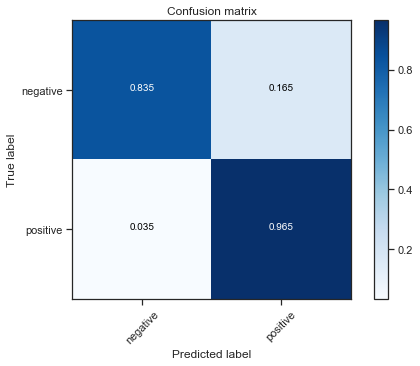

In [81]:
# draw confusion matrix
from statlearning import plot_confusion_matrix

confusion = confusion_matrix(y_test, y_pred)  

fig, ax = plt.subplots(figsize = (7,5))
plot_confusion_matrix(confusion, classes = ['negative', 'positive'], normalize = True)
plt.show()

# 5. Model Evaluation

In [82]:
# Use cross validation on the training set to compare the performance of Model 1 and Model 2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(5)

benchmark_model_scores = cross_val_score(benchmark_model, x_train_benchmark, y_train_benchmark, cv = kf)
benchmark_model_mean = np.mean(benchmark_model_scores)

optimized_model_scores = cross_val_score(optimized_model, x_train, y_train, cv = kf)
optimized_model_mean = np.mean(optimized_model_scores)

In [83]:
data = [
    {"Model": "Benchmark Model", "CV Accuracy": benchmark_model_mean.round(3)},
    {"Model": "Optimized Model", "CV Accuracy": optimized_model_mean.round(3)}
]

results = pd.DataFrame(data)
results = results.set_index("Model")
results

# choose the model with higher CV accuracy -- Optimized Model

,CV Accuracy
Model,
Benchmark Model,0.877
Optimized Model,0.941


In [84]:
# Using the best model, calculate the performance on the test set (i.e. estimate out of sample error)
optimized_model.score(x_test, y_test).round(3)

0.942

In [85]:
benchmark_model.score(x_test_benchmark, y_test_benchmark).round(3)

0.876

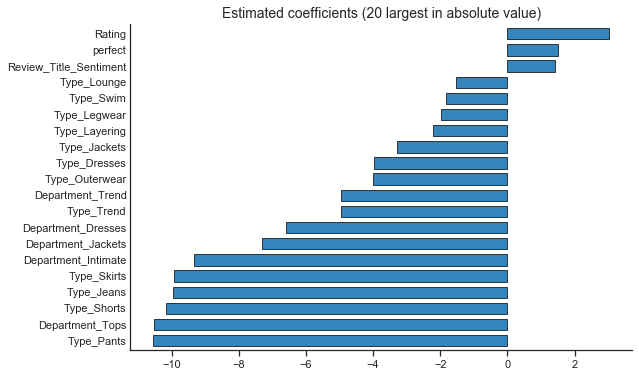

In [86]:
from statlearning import plot_coefficients
plot_coefficients(optimized_model, train_feature_list)
plt.show()

# Predict

In [87]:
test_data.head()

,ID,Age,Rating,Positive_Feedback_Count,Positive_Feedback_Count_0,Division_General Petite,Division_Initmates,Department_Dresses,Department_Intimate,Department_Jackets,...,Review_Text_Sentiment,Review_Title_Sentiment,comfortable,cute,fit,flattering,great,love,perfect,soft
0,10,53,3,14,0,0,0,1,0,0,...,0.3578,0.3612,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.0
1,11,39,5,2,0,1,0,1,0,0,...,0.8927,0.0000,0.0,0.0,0.0000,0.392160,0.000000,0.000000,0.000000,0.0
2,13,44,5,0,1,0,1,0,1,0,...,0.8036,0.0000,0.0,0.0,0.2741,0.000000,0.000000,0.000000,0.000000,0.0
3,19,47,5,0,1,0,0,1,0,0,...,0.9345,0.5106,0.5,0.0,0.0000,0.135719,0.000000,0.097443,0.267806,0.0
4,24,55,5,0,1,0,0,0,0,0,...,0.9572,0.0000,0.0,0.0,0.0000,0.000000,0.102141,0.087048,0.000000,0.0


In [88]:
x_test = test_data[train_feature_list].to_numpy()
y_class = optimized_model.predict(x_test)
test_data['Recommended'] = y_class
sumbmission = test_data[['ID', 'Recommended']]
sumbmission.head()

,ID,Recommended
0,10,0
1,11,1
2,13,1
3,19,1
4,24,1


In [89]:
sumbmission.to_csv('Group097_Test_Results.csv', index = False)